# Bibliotecas e Conectando com o Google Drive

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Casos e óbitos ao longo do tempo

Dados do Brasil.IO

caso.csv.gz e caso_full.csv.gz

https://brasil.io/dataset/covid19/files/

https://brasil.io/datasets/

https://brasil.io/home/



## Acumulados

### Lendo e organizando o DataFrame

In [ ]:
caminho = "/content/drive/MyDrive/Google Colab/P0 e P(t)/caso.csv"
caminho = "/content/drive/MyDrive/VisaVi-SE/Conteúdo do Portal/Gráficos: Casos e Óbitos ao longo do tempo/caso_01_06_21.csv"
caso_0 = pd.read_csv(caminho)
df_caos_obitos = caso_0.copy()

In [ ]:
dados_aracaju = df_caos_obitos.loc[df_caos_obitos['city'] == "Aracaju"]
dados_aracaju = dados_aracaju.filter(items=['date', 'city', 'confirmed', 'deaths'])
dados_aracaju = dados_aracaju.sort_values(by='date')

In [ ]:
dados_aracaju.head()

,date,city,confirmed,deaths
1429382,2020-03-14,Aracaju,1,0
1429381,2020-03-16,Aracaju,5,0
1429380,2020-03-18,Aracaju,5,0
1429379,2020-03-20,Aracaju,5,0
1429378,2020-03-21,Aracaju,7,0


In [ ]:
dados_aracaju.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 1429382 to 1428990
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       393 non-null    object
 1   city       393 non-null    object
 2   confirmed  393 non-null    int64 
 3   deaths     393 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 15.4+ KB


In [ ]:
# Passo a coluna date para o formato de data

dados_aracaju['date'] = pd.to_datetime(dados_aracaju.date, format='%Y/%m/%d')

In [ ]:
dados_aracaju.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 1429382 to 1428990
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       393 non-null    datetime64[ns]
 1   city       393 non-null    object        
 2   confirmed  393 non-null    int64         
 3   deaths     393 non-null    int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 15.4+ KB


### Gráficos

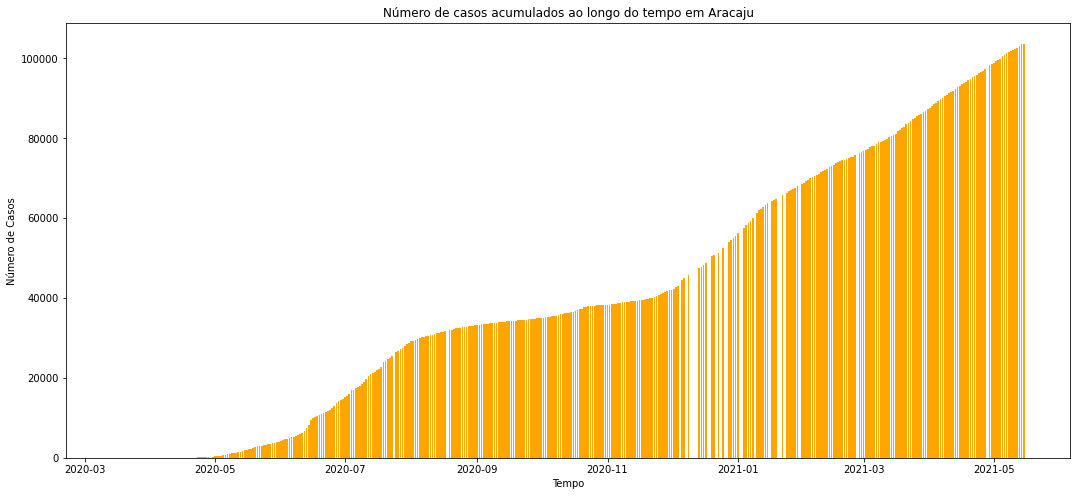

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(18,8))

ax.bar(dados_aracaju['date'], dados_aracaju['confirmed'], color="Orange")
ax.set_ylabel('Número de Casos')
ax.set_xlabel('Tempo')
ax.set_title('Número de casos acumulados ao longo do tempo em Aracaju')

plt.show()

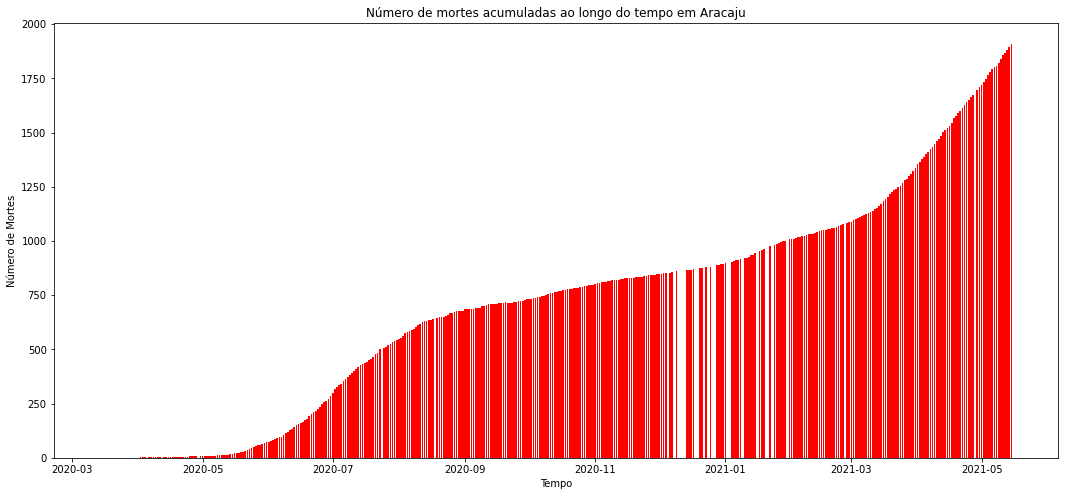

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(18,8))

ax.bar(dados_aracaju['date'], dados_aracaju['deaths'], color="Red")
ax.set_ylabel('Número de Mortes')
ax.set_xlabel('Tempo')
ax.set_title('Número de mortes acumuladas ao longo do tempo em Aracaju')

plt.show()

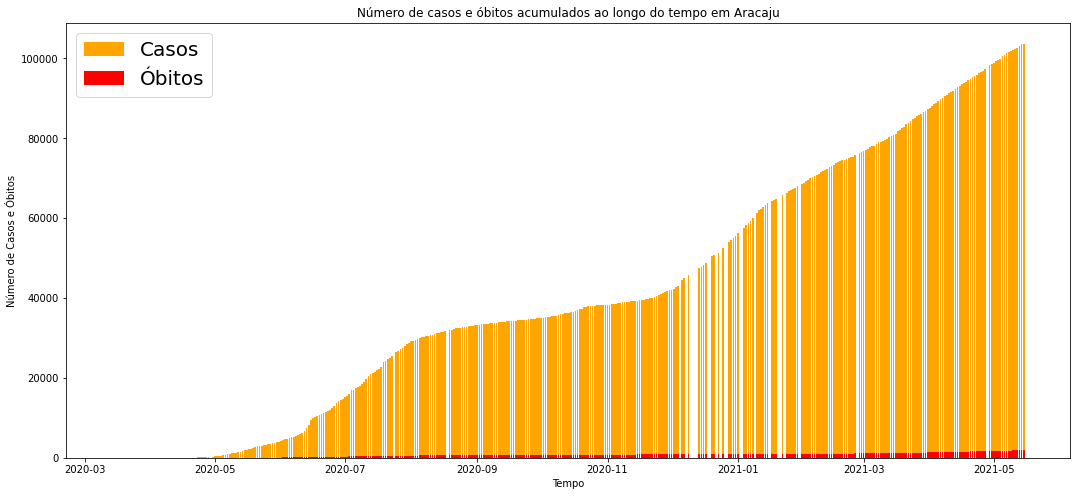

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(18,8))

ax.bar(dados_aracaju['date'], dados_aracaju['confirmed'], color="Orange", label="Casos")
ax.bar(dados_aracaju['date'], dados_aracaju['deaths'], color="Red", label="Óbitos")
ax.set_ylabel('Número de Casos e Óbitos')
ax.set_xlabel('Tempo')
ax.set_title('Número de casos e óbitos acumulados ao longo do tempo em Aracaju')

ax.legend(fontsize=20)

plt.show()

## Diário

### Lendo e Organizando DataFrame

In [3]:
caminho = "/content/drive/MyDrive/Google Colab/P0 e P(t)/caso_full.csv"
caminho = "/content/drive/MyDrive/VisaVi-SE/Conteúdo do Portal/Gráficos: Casos e Óbitos ao longo do tempo/caso_full_01_06_21.csv"
caso_full_0 = pd.read_csv(caminho)
df_casos_obitos_diario = caso_full_0.copy()

In [4]:
dados_aracaju_diario = df_casos_obitos_diario.loc[df_casos_obitos_diario['city'] == "Aracaju"]
dados_aracaju_diario = dados_aracaju_diario.filter(items=['city', 'date', 'new_confirmed', 'new_deaths'])

In [5]:
# Remove os valores negativos de mortes

for i in dados_aracaju_diario.index:
  if dados_aracaju_diario['new_deaths'][i] < 0:
    dados_aracaju_diario['new_deaths'][i] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [13]:
dados_aracaju_diario.head(10)

,city,date,new_confirmed,new_deaths
1834885,Aracaju,2020-03-14,1,0
1834887,Aracaju,2020-03-15,0,0
1834889,Aracaju,2020-03-16,4,0
1834891,Aracaju,2020-03-17,0,0
1834893,Aracaju,2020-03-18,0,0
1834896,Aracaju,2020-03-19,0,0
1834899,Aracaju,2020-03-20,0,0
1834902,Aracaju,2020-03-21,2,0
1834906,Aracaju,2020-03-22,0,0
1834910,Aracaju,2020-03-23,0,0


In [7]:
dados_aracaju_diario.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 445 entries, 1834885 to 1865010
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   city           445 non-null    object
 1   date           445 non-null    object
 2   new_confirmed  445 non-null    int64 
 3   new_deaths     445 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 37.4+ KB


In [8]:
dados_aracaju_diario['date'] = pd.to_datetime(dados_aracaju_diario.date, format='%Y/%m/%d')

In [9]:
dados_aracaju_diario.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 445 entries, 1834885 to 1865010
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   city           445 non-null    object        
 1   date           445 non-null    datetime64[ns]
 2   new_confirmed  445 non-null    int64         
 3   new_deaths     445 non-null    int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 37.4+ KB


### Gráficos

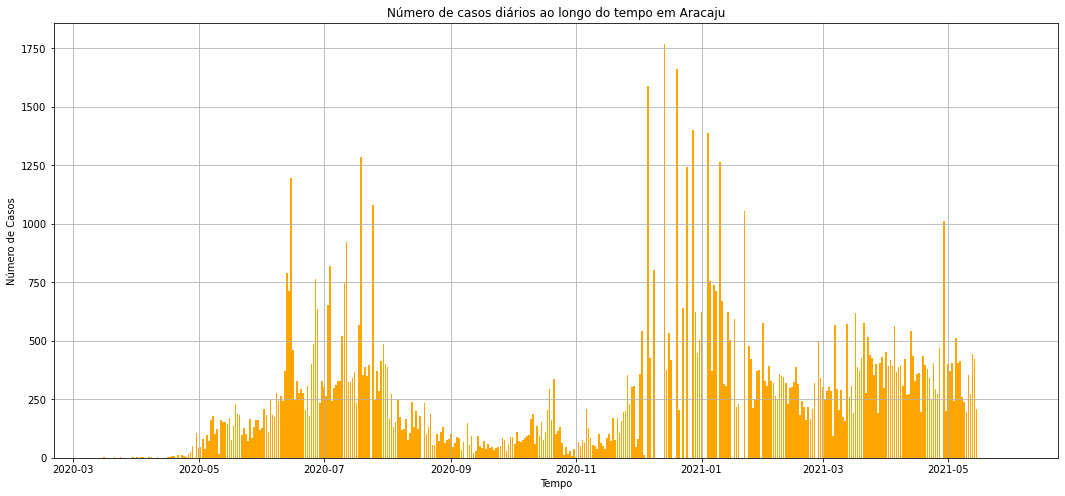

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(18,8))

ax.bar(dados_aracaju_diario['date'], dados_aracaju_diario['new_confirmed'], color="Orange")
ax.set_ylabel('Número de Casos')
ax.set_xlabel('Tempo')
ax.set_title('Número de casos diários ao longo do tempo em Aracaju')
ax.grid(True)

plt.show()

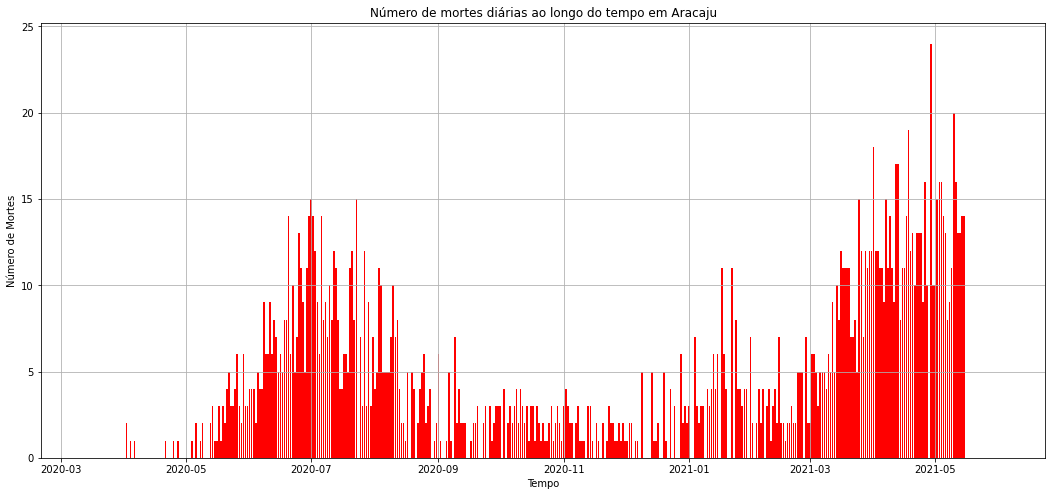

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(18,8))

ax.bar(dados_aracaju_diario['date'], dados_aracaju_diario['new_deaths'], color="Red")
ax.set_ylabel('Número de Mortes')
ax.set_xlabel('Tempo')
ax.set_title('Número de mortes diárias ao longo do tempo em Aracaju')
ax.grid(True)

plt.show()